In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import pickle

In [40]:
import os
curr_dir = os.getcwd()  # Get current directory
print(f"curr_dir: {curr_dir}")
file_path = os.path.join(curr_dir, "data_source", "financial_risk_assessment.csv")  # Construct the file path
print(f"file_path: {file_path}")
# Load the dataset
data = pd.read_csv(file_path)

curr_dir: d:\AAA_SRH_Study\python_programming\final_project\Loan_Approval_Prediction_Flask_ML_project\ml
file_path: d:\AAA_SRH_Study\python_programming\final_project\Loan_Approval_Prediction_Flask_ML_project\ml\data_source\financial_risk_assessment.csv


In [13]:
# Display the first few rows to understand the data
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
   Age      Gender Education Level Marital Status   Income  Credit Score  \
0   49        Male             PhD       Divorced  72799.0         688.0   
1   57      Female      Bachelor's        Widowed      NaN         690.0   
2   21  Non-binary        Master's         Single  55687.0         600.0   
3   59        Male      Bachelor's         Single  26508.0         622.0   
4   25  Non-binary      Bachelor's        Widowed  49427.0         766.0   

   Loan Amount Loan Purpose Employment Status  Years at Current Job  \
0      45713.0     Business        Unemployed                    19   
1      33835.0         Auto          Employed                     6   
2      36623.0         Home          Employed                     8   
3      26541.0     Personal        Unemployed                     2   
4      36528.0     Personal        Unemployed                    10   

  Payment History  Debt-to-Income Ratio  Assets Value  Number of Dependents  \
0     

In [14]:
# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())


Missing values in each column:
Age                         0
Gender                      0
Education Level             0
Marital Status              0
Income                   2250
Credit Score             2250
Loan Amount              2250
Loan Purpose                0
Employment Status           0
Years at Current Job        0
Payment History             0
Debt-to-Income Ratio        0
Assets Value             2250
Number of Dependents     2250
City                        0
State                       0
Country                     0
Previous Defaults        2250
Marital Status Change       0
Risk Rating                 0
dtype: int64


In [15]:
# Handle missing values (for the entire dataset initially)
for column in data.columns:
    if data[column].dtype == 'object':  # Categorical columns
        data[column].fillna(data[column].mode()[0], inplace=True)
    else:  # Numerical columns
        data[column].fillna(data[column].median(), inplace=True)

C:\Users\11573\AppData\Local\Temp\ipykernel_28316\2028995338.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].median(), inplace=True)
C:\Users\11573\AppData\Local\Temp\ipykernel_28316\2028995338.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


In [16]:
# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())


Missing values in each column:
Age                      0
Gender                   0
Education Level          0
Marital Status           0
Income                   0
Credit Score             0
Loan Amount              0
Loan Purpose             0
Employment Status        0
Years at Current Job     0
Payment History          0
Debt-to-Income Ratio     0
Assets Value             0
Number of Dependents     0
City                     0
State                    0
Country                  0
Previous Defaults        0
Marital Status Change    0
Risk Rating              0
dtype: int64


In [17]:
# Filter numerical columns (integers and floats)
numerical_cols = data.select_dtypes(include=['int64', 'float64'])

In [18]:
# Count the numerical columns
num_numerical_cols = numerical_cols.shape[1]

In [19]:
# Print the result
print(f"Number of numerical columns: {num_numerical_cols}")

Number of numerical columns: 10


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    15000 non-null  int64  
 1   Gender                 15000 non-null  object 
 2   Education Level        15000 non-null  object 
 3   Marital Status         15000 non-null  object 
 4   Income                 15000 non-null  float64
 5   Credit Score           15000 non-null  float64
 6   Loan Amount            15000 non-null  float64
 7   Loan Purpose           15000 non-null  object 
 8   Employment Status      15000 non-null  object 
 9   Years at Current Job   15000 non-null  int64  
 10  Payment History        15000 non-null  object 
 11  Debt-to-Income Ratio   15000 non-null  float64
 12  Assets Value           15000 non-null  float64
 13  Number of Dependents   15000 non-null  float64
 14  City                   15000 non-null  object 
 15  St

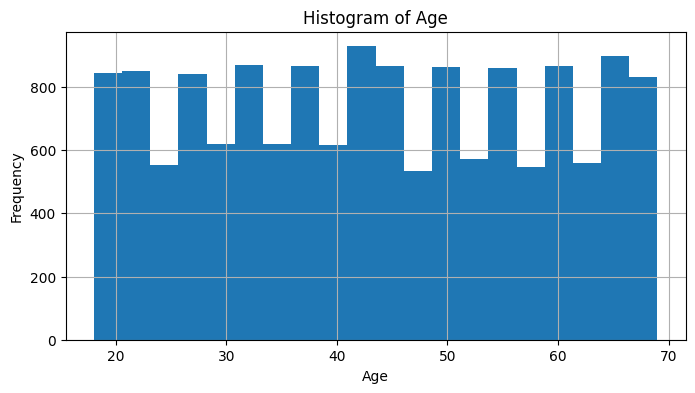

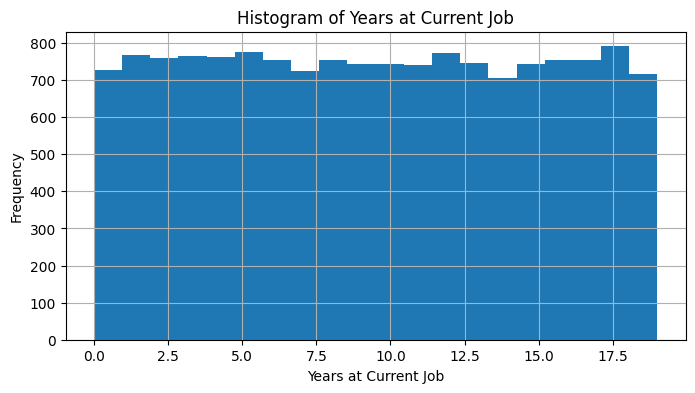

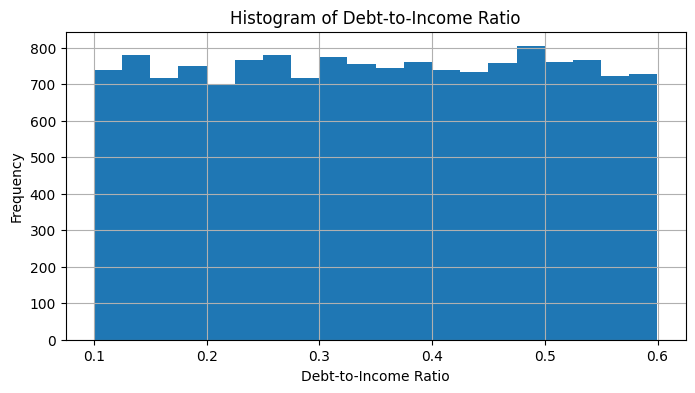

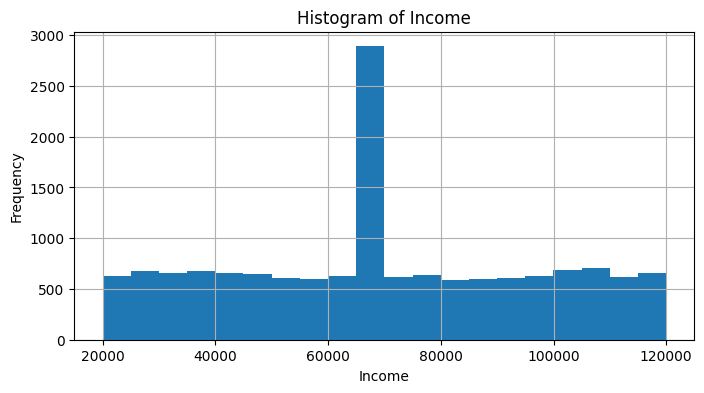

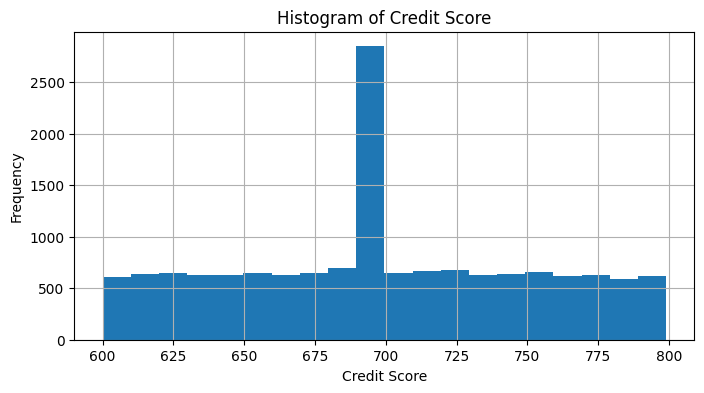

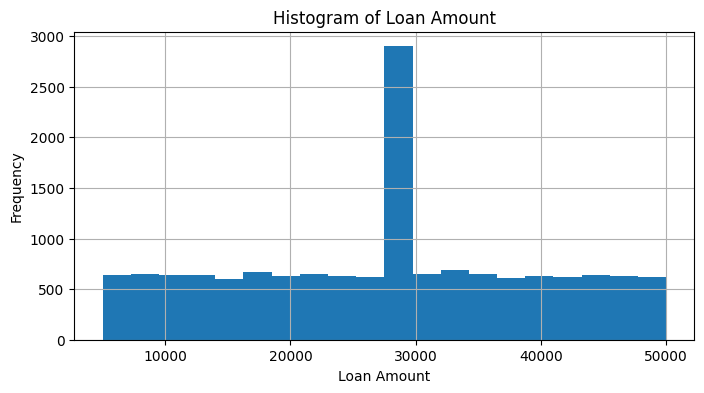

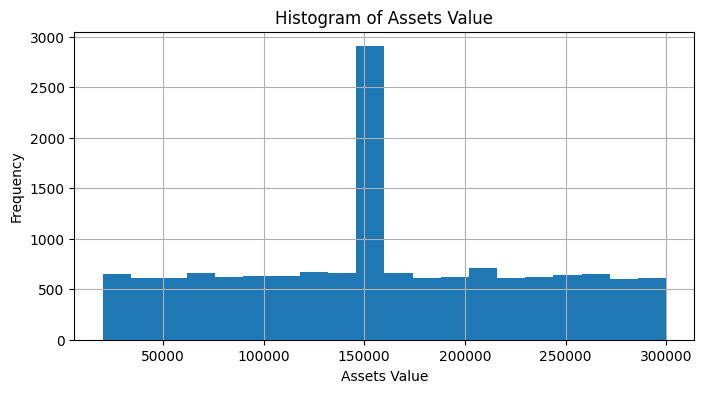

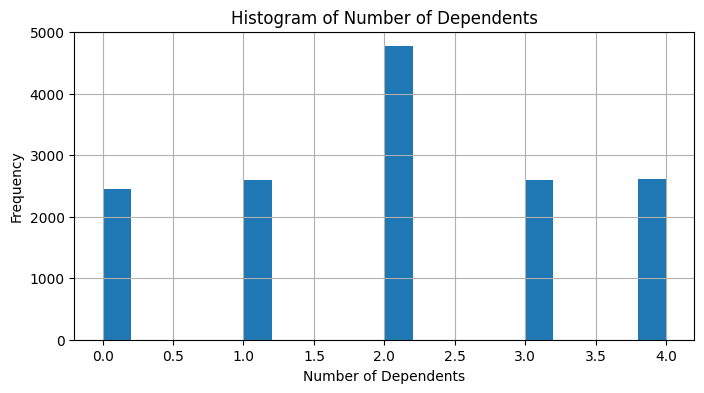

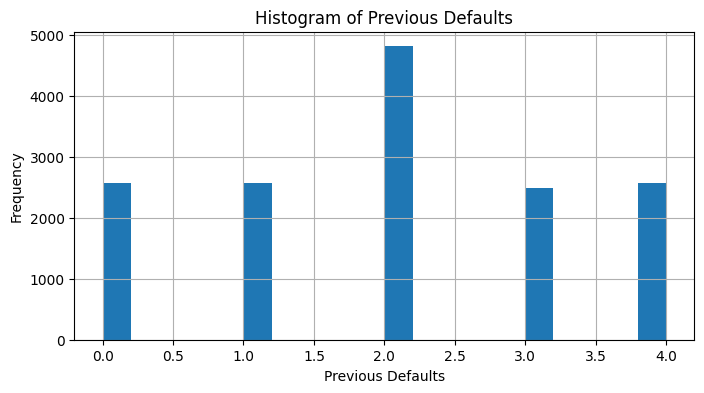

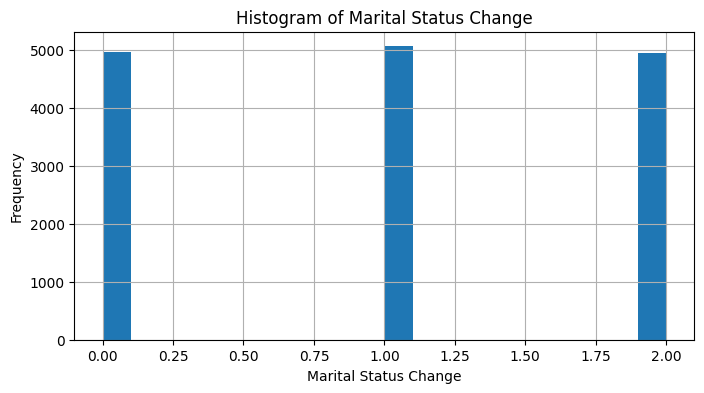

In [21]:
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame; replace with your actual DataFrame name
# List of numerical columns to analyze
numerical_cols = ['Age', 'Years at Current Job', 'Debt-to-Income Ratio', 'Income', 'Credit Score', 'Loan Amount', 'Assets Value', 
                  'Number of Dependents', 'Previous Defaults', 'Marital Status Change']

# Plot histograms for each column
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    data[col].hist(bins=20)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

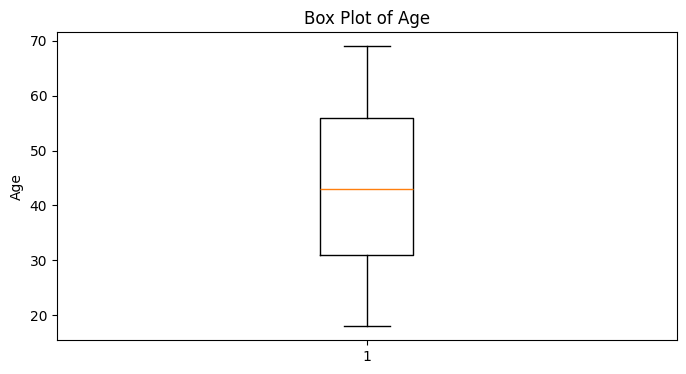

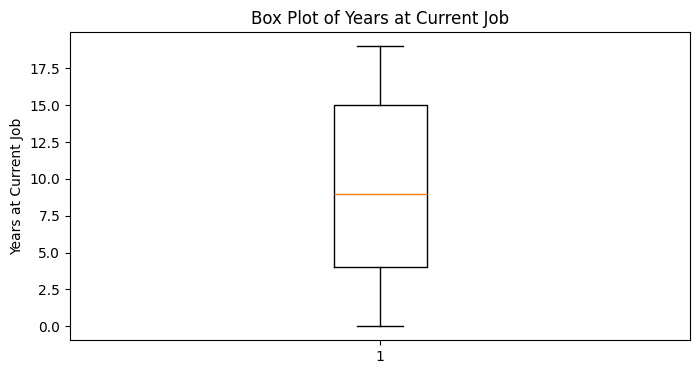

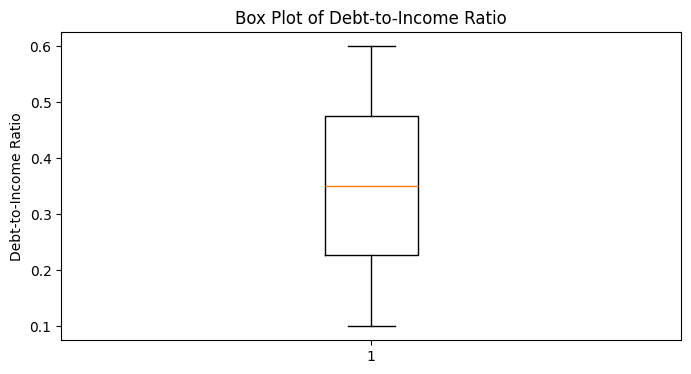

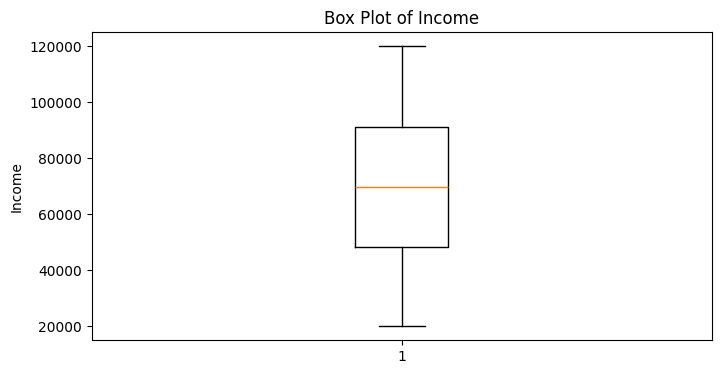

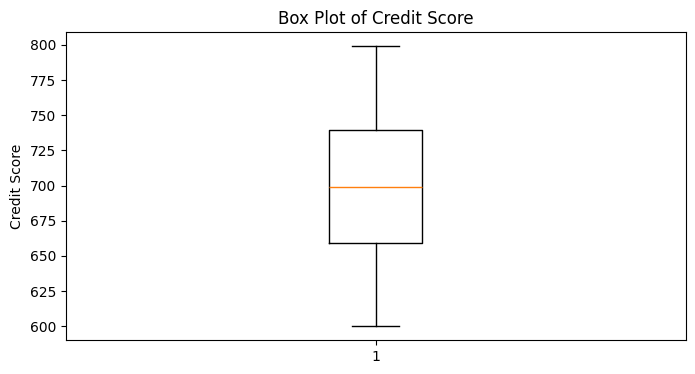

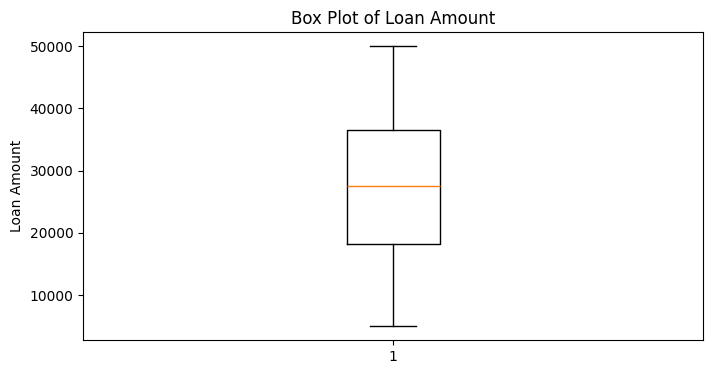

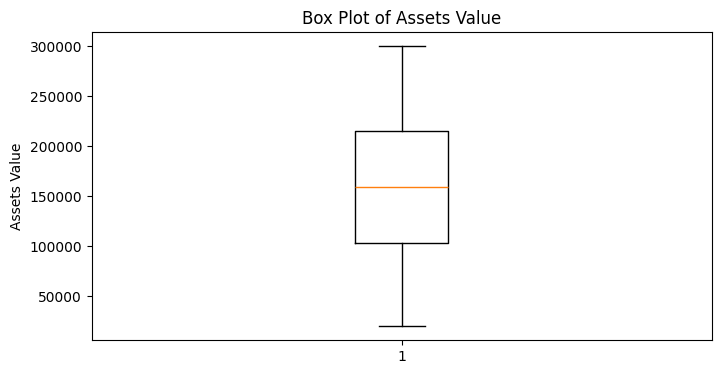

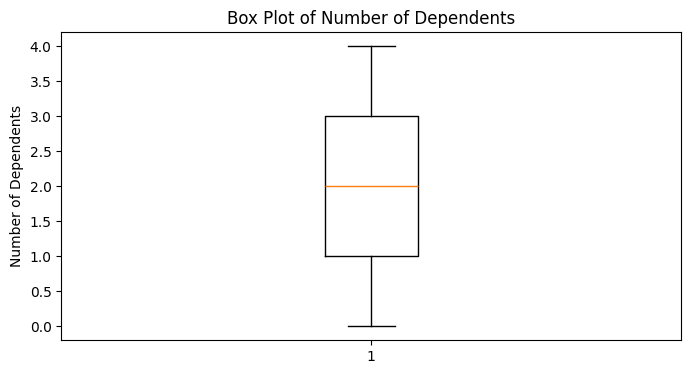

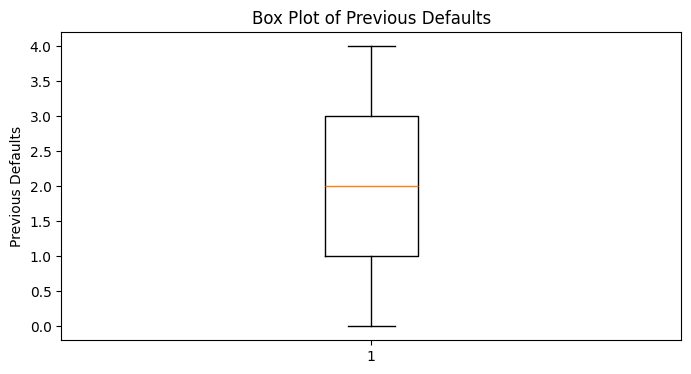

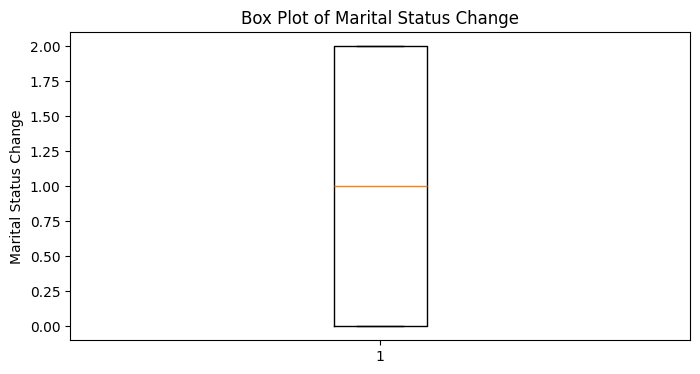

In [22]:
# Plot box plots for each column
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    plt.boxplot(data[col].dropna())  # Drop NaN to focus on existing data
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
    plt.show()

In [23]:
from scipy import stats
import numpy as np

# Calculate z-scores and identify outliers for each column
for col in numerical_cols:
    z_scores = stats.zscore(data[col].dropna())  # Drop NaN for calculation
    outliers = data[col][np.abs(z_scores) > 3]
    print(f"\nOutliers in {col}:")
    print(outliers)


Outliers in Age:
Series([], Name: Age, dtype: int64)

Outliers in Years at Current Job:
Series([], Name: Years at Current Job, dtype: int64)

Outliers in Debt-to-Income Ratio:
Series([], Name: Debt-to-Income Ratio, dtype: float64)

Outliers in Income:
Series([], Name: Income, dtype: float64)

Outliers in Credit Score:
Series([], Name: Credit Score, dtype: float64)

Outliers in Loan Amount:
Series([], Name: Loan Amount, dtype: float64)

Outliers in Assets Value:
Series([], Name: Assets Value, dtype: float64)

Outliers in Number of Dependents:
Series([], Name: Number of Dependents, dtype: float64)

Outliers in Previous Defaults:
Series([], Name: Previous Defaults, dtype: float64)

Outliers in Marital Status Change:
Series([], Name: Marital Status Change, dtype: int64)


In [24]:
def simulate_approval(row):
    # Calculate loan-to-value ratio
    ltv_ratio = row['Loan Amount'] / row['Assets Value'] if row['Assets Value'] > 0 else float('inf')
    
    # Core conditions with some flexibility
    if ((row['Credit Score'] > 680 or (row['Credit Score'] > 650 and row['Income'] > 40000)) and
        row['Debt-to-Income Ratio'] < 0.43 and
        row['Previous Defaults'] == 0 and
        row['Income'] > 30000 and
        row['Assets Value'] > 50000 and
        ltv_ratio < 0.8 and
        row['Employment Status'] != 'Unemployed' and
        row['Years at Current Job'] >= 2):  # Stability indicator
        return 1  # Approved
    else:
        return 0  # Not Approved

In [25]:
data['Loan_Approval'] = data.apply(simulate_approval, axis=1)

In [26]:
# Select only the nine specified columns
selected_columns = [
    'Age', 'Income', 'Credit Score', 'Loan Amount', 'Employment Status',
    'Years at Current Job', 'Debt-to-Income Ratio', 'Assets Value', 'Previous Defaults'
]

In [27]:
X = data[selected_columns]  # Features
y = data['Loan_Approval']   # Target

In [28]:
# Define categorical and numerical columns among the selected nine
categorical_cols = ['Employment Status']  # Only this is categorical
numerical_cols = [col for col in selected_columns if col not in categorical_cols]  # The rest are numerical

In [29]:
# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'  # Pass numerical columns through without transformation
)

In [30]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Apply preprocessing to the training and testing sets
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

In [32]:
# Scale the preprocessed features
scaler = StandardScaler(with_mean=False)  # Use with_mean=False due to sparse matrix from OneHotEncoder
X_train_scaled = scaler.fit_transform(X_train_preprocessed)
X_test_scaled = scaler.transform(X_test_preprocessed)

In [33]:
# Train the model (Logistic Regression)
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [34]:
# Evaluate the model
y_pred = model.predict(X_test_scaled)
print("\nModel Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Model Evaluation:
Accuracy: 0.9756666666666667

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2864
           1       0.76      0.68      0.72       136

    accuracy                           0.98      3000
   macro avg       0.87      0.84      0.85      3000
weighted avg       0.97      0.98      0.98      3000



In [35]:
# Sample applicant matching the nine columns
sample_applicant = {
    'Age': 35,
    'Income': 50000,
    'Credit Score': 700,
    'Loan Amount': 20000,
    'Employment Status': 'Employed',
    'Years at Current Job': 5,
    'Debt-to-Income Ratio': 0.3,
    'Assets Value': 150000,
    'Previous Defaults': 0
}

# Convert to DataFrame
applicant_df = pd.DataFrame([sample_applicant])

# Preprocess and scale
applicant_preprocessed = preprocessor.transform(applicant_df)
applicant_scaled = scaler.transform(applicant_preprocessed)

# Predict
prediction = model.predict(applicant_scaled)
print(f"Prediction: {'Approved' if prediction[0] == 1 else 'Denied'}")

Prediction: Denied


In [36]:
# Sample applicant matching the nine columns
sample_applicant = {
    'Age': 35,
    'Income': 50000,
    'Credit Score': 700,
    'Loan Amount': 20000,
    'Employment Status': 'Employed',
    'Years at Current Job': 5,
    'Debt-to-Income Ratio': 0.03,
    'Assets Value': 150000,
    'Previous Defaults': 0
}

# Convert to DataFrame
applicant_df = pd.DataFrame([sample_applicant])

# Preprocess and scale
applicant_preprocessed = preprocessor.transform(applicant_df)
applicant_scaled = scaler.transform(applicant_preprocessed)

# Predict
prediction = model.predict(applicant_scaled)
print(f"Prediction: {'Approved' if prediction[0] == 1 else 'Denied'}")

Prediction: Approved


In [37]:
# Save the preprocessor, scaler, and model for later use
#with open('preprocessor.pkl', 'wb') as f:
#    pickle.dump(preprocessor, f)
#with open('scaler.pkl', 'wb') as f:
#    pickle.dump(scaler, f)
#with open('model.pkl', 'wb') as f:
#    pickle.dump(model, f)
#
#print("Model and preprocessing objects saved successfully!")

In [ ]:
"""
Why is joblib better here?
Faster: joblib is optimized for storing large NumPy arrays, which are common in ML models.
More Efficient: It uses memory mapping, allowing large models to be loaded faster without consuming extra RAM.
For saving ML models & preprocessing objects (Scikit-Learn, XGBoost) → Use joblib (faster, more efficient).
"""


import joblib
# Save the model and preprocessing objects  
joblib.dump(model, 'models/model_2.pkl')  
joblib.dump(preprocessor, 'models/preprocessor_2.pkl')  
joblib.dump(scaler, 'models/scaler_2.pkl')  

print("Model and preprocessing objects saved through joblib successfully!")

Model and preprocessing objects saved through joblib successfully!
